<a href="https://colab.research.google.com/github/Risingresearchlab/Risingresearchlab/blob/main/fetal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fetal_health.csv to fetal_health.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.shape

(2126, 22)

In [ ]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

1<-Normal
2<-Suspect
3<-Pathological

Separating the target and feature variables

In [ ]:
x=df.drop (columns='fetal_health', axis=1)
y=df['fetal_health']

#Selecting features that have a greater than 10% correlation with the target variable


#standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
standardized_data=ss.transform(x)

In [ ]:
print(standardized_data)

[[-1.35222005 -0.8223883  -0.20320955 ... -1.18164215  1.87056871
   1.11298001]
 [-0.1325256   0.73013282 -0.20320955 ...  0.13203796 -0.23499819
  -0.52452553]
 [-0.03088439 -0.04612774 -0.20320955 ... -0.00624416 -0.2004807
  -0.52452553]
 ...
 [ 0.68060404 -0.56363478 -0.20320955 ...  0.96173066 -0.51113811
   1.11298001]
 [ 0.68060404 -0.56363478 -0.20320955 ...  0.8925896  -0.51113811
   1.11298001]
 [ 0.88388645 -0.30488126 -0.16034157 ...  0.47774325 -0.61469058
  -0.52452553]]


In [ ]:
x=standardized_data
y = df['fetal_health']

#Train test splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=2)

**Naive** **Bayes**

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print('Classification Report of Naive Bayes:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))


Classification Report of Naive Bayes:
               precision    recall  f1-score   support

         1.0       1.00      0.66      0.80       332
         2.0       0.32      0.93      0.48        59
         3.0       0.57      0.57      0.57        35

    accuracy                           0.69       426
   macro avg       0.63      0.72      0.62       426
weighted avg       0.87      0.69      0.73       426

Confusion Matrix:
 [[220 100  12]
 [  1  55   3]
 [  0  15  20]]
Accuracy Score: 0.6924882629107981


In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)
p2=model.predict(x_test)
s2=accuracy_score(y_test,p2)
print("Naive bayes Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(model, x_test, y_test)
plt.show()

Naive bayes Classifier Success Rate : 69.25%


NameError: ignored

# Support Vector Machine

In [ ]:
# Support vector machine
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score


In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train) 
pred=clf.predict(x_test)
print('Classification Report of SVM:\n',classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))

Classification Report of SVM:
               precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       332
         2.0       0.70      0.64      0.67        59
         3.0       1.00      0.71      0.83        35

    accuracy                           0.90       426
   macro avg       0.87      0.77      0.82       426
weighted avg       0.90      0.90      0.89       426

[[319  13   0]
 [ 21  38   0]
 [  7   3  25]]

Accuracy: 0.8967


Support vector Classifier Success Rate : 89.44%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


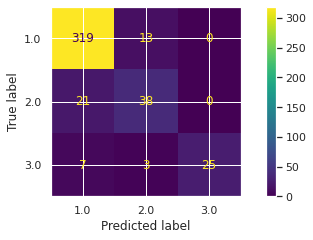

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
p2=model.predict(x_test)
s2=accuracy_score(y_test,p2)
print("Support vector Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

# K- Nearest Neighbors

In [ ]:
# KNN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = knn.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[320,  11,   1],
       [ 23,  35,   1],
       [  7,   4,  24]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=10)

In [ ]:
predictions = neigh.predict(x_test)
print('Classification Report of KNN:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Classification Report of KNN:
               precision    recall  f1-score   support

         1.0       0.91      0.98      0.95       332
         2.0       0.74      0.54      0.63        59
         3.0       1.00      0.74      0.85        35

    accuracy                           0.90       426
   macro avg       0.89      0.76      0.81       426
weighted avg       0.90      0.90      0.89       426

Confusion Matrix:
 [[326   6   0]
 [ 27  32   0]
 [  4   5  26]]
Accuracy Score: 0.9014084507042254


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


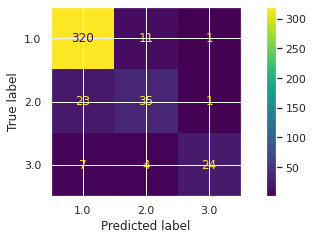

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train,y_train)
p5=model.predict(x_test)
s2=accuracy_score(y_test,p5)
plot_confusion_matrix(knn, x_test, y_test, color='white')
plt.show()

Parameter tuning, Finding optimum parameters

# K-NN tuning

In [ ]:
import time
from sklearn.model_selection import GridSearchCV

params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

tic = time.time()

knn_gs = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
knn_gs_res = knn_gs.fit(x_train, y_train)
best_params = knn_gs_res.best_params_

print("Best score: ",knn_gs_res.best_score_)
print("Best parameters: ",best_params)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score:  0.9158777937733572
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Total elapsed time: 3.6784534454345703 seconds.


In [ ]:
knn = KNeighborsClassifier(**best_params)
knn.fit(x_train, y_train)

y_hat = knn.predict(x_train)
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       332
         2.0       0.80      0.59      0.68        59
         3.0       1.00      0.77      0.87        35

    accuracy                           0.91       426
   macro avg       0.90      0.78      0.83       426
weighted avg       0.91      0.91      0.91       426

Training set accuracy:  0.9988235294117647
Test set accuracy:  0.9107981220657277
[[326   6   0]
 [ 24  35   0]
 [  5   3  27]]


# Logistic Regression

In [ ]:
# Binomial_logistic_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import io


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)
 
predictions = logreg.predict(x_test)
print('Classification Report BLR:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Coefficients: [[-0.24652304  1.96171044 -0.42635209  0.43668237 -0.12123798  0.0673308
  -0.92968598 -1.4797246   0.32195275 -0.657861   -0.13926654 -0.06498881
  -0.17276357 -0.42568737  0.22257    -0.12737278  0.41320383 -0.77331912
   0.61785834 -0.74326811 -0.0825057 ]
 [-1.18410251 -1.17743669 -0.04571081 -0.30484577 -0.1363224  -0.0454537
   0.44764368 -0.02367065  0.02744267 -0.14834492 -0.10037383 -0.11493896
   0.20121423  0.08194345  0.58673169 -0.05423084  0.28884092  1.76378917
   0.32086318 -0.00505658  0.0219353 ]
 [ 1.43062555 -0.78427375  0.4720629  -0.1318366   0.25756039 -0.0218771
   0.48204229  1.50339525 -0.34939543  0.80620591  0.23964037  0.17992777
  -0.02845065  0.34374391 -0.80930169  0.18160362 -0.70204475 -0.99047005
  -0.93872152  0.74832469  0.0605704 ]]
Intercept: [ 4.36625978  0.05550982 -4.42176961]
Classification Report BLR:
               precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       332
         2.0       

Linear Regression Success Rate : 89.20%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


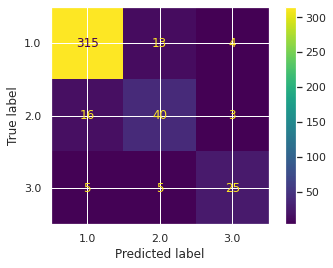

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
p1=logreg.predict(x_test)
s1=accuracy_score(y_test,p1)
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(logreg, x_test, y_test)
plt.show()


#LR tuning

In [ ]:
params ={'C':[0.001,0.01,0.1,1,10,100,1000],
      "penalty":["l1","l2"]} 

tic = time.time()

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,params,cv=10)
logreg_cv.fit(x_train,y_train)

best_params = logreg_cv.best_params_

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
Accuracy : 0.8929411764705882
Total elapsed time: 4.6111900806427 seconds.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
logreg = LogisticRegression(**best_params)
logreg.fit(x_train,y_train)
y_pred_test = logreg.predict(x_test)
print(classification_report(y_test, y_pred_test))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       332
         2.0       0.71      0.66      0.68        59
         3.0       0.83      0.69      0.75        35

    accuracy                           0.89       426
   macro avg       0.82      0.77      0.79       426
weighted avg       0.89      0.89      0.89       426

Test set accuracy:  0.892018779342723
[[317  11   4]
 [ 19  39   1]
 [  6   5  24]]


In [ ]:
# adaptive_boosting
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
model = AdaModel.fit(x_train, y_train)

In [ ]:
predictions = AdaModel.predict(x_test)
print('Classification Report of AdaBoost:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))


Classification Report of AdaBoost:
               precision    recall  f1-score   support

         1.0       0.94      0.93      0.93       332
         2.0       0.65      0.68      0.66        59
         3.0       0.94      0.94      0.94        35

    accuracy                           0.89       426
   macro avg       0.84      0.85      0.85       426
weighted avg       0.90      0.89      0.90       426

Confusion Matrix:
 [[308  22   2]
 [ 19  40   0]
 [  2   0  33]]
Accuracy Score: 0.8943661971830986


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


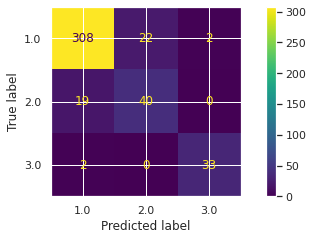

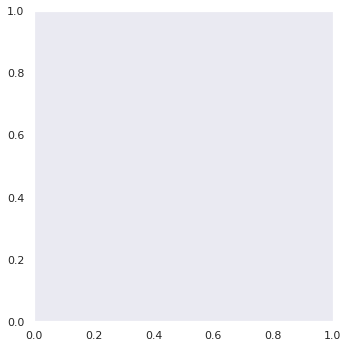

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
AdaModel.fit(x_train,y_train)
p5=AdaModel.predict(x_test)
s2=accuracy_score(y_test,p5)
plot_confusion_matrix(AdaModel, x_test, y_test)
plt.figure(figsize=(5,5))
plt.grid(False)


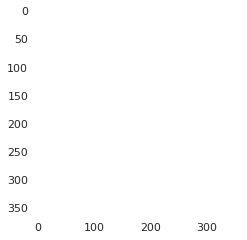

In [ ]:
from matplotlib import pyplot as plt
import cv2

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

img = cv2.imread('abc.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.grid(False)
plt.imshow(img)

plt.show()

In [ ]:
files.download("abc.jpg") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [ ]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       332
         2.0       0.74      0.59      0.66        59
         3.0       1.00      0.83      0.91        35

    accuracy                           0.91       426
   macro avg       0.89      0.80      0.84       426
weighted avg       0.91      0.91      0.91       426


Accuracy: 0.9108
Confusion Matrix:
 [[324   8   0]
 [ 24  35   0]
 [  2   4  29]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


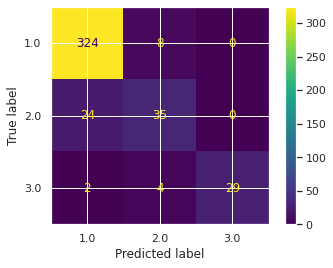

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x_train,y_train)
p5=rf.predict(x_test)
s2=accuracy_score(y_test,p5)
plot_confusion_matrix(rf, x_test, y_test)
plt.show()

# DTC/CART/J48

In [ ]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier()
drugTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred  = drugTree.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
predictions = drugTree.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       332
         2.0       0.75      0.66      0.70        59
         3.0       0.94      0.94      0.94        35

    accuracy                           0.92       426
   macro avg       0.88      0.85      0.86       426
weighted avg       0.91      0.92      0.91       426


Accuracy: 0.9155
Confusion Matrix:
 [[318  13   1]
 [ 19  39   1]
 [  2   0  33]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


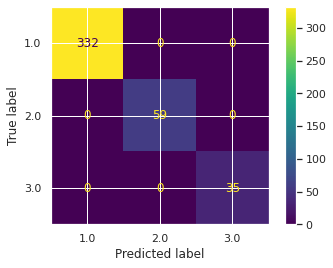

In [ ]:
drugTree = DecisionTreeClassifier()
drugTree.fit(x_train,y_train)
p5=drugTree.predict(x_test)
s2=accuracy_score(y_test,p5)
plot_confusion_matrix(drugTree, x_test, y_test)
plt.show()

#GBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gradient_booster.fit(x_train,y_train)
print(classification_report(y_test,gradient_booster.predict(x_test)))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       332
         2.0       0.85      0.78      0.81        59
         3.0       0.97      0.94      0.96        35

    accuracy                           0.95       426
   macro avg       0.93      0.90      0.91       426
weighted avg       0.94      0.95      0.95       426



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


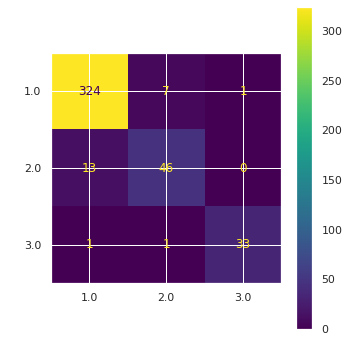

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(x_train,y_train)
p5=gradient_booster.predict(x_test)
s2=accuracy_score(y_test,p5)
matrix= plot_confusion_matrix(gradient_booster, x_test, y_test)
matrix.ax_.set_title('Confusion Matrix', color='white')
plt.xlabel('Predicted label', color='white')
plt.ylabel('True labe', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(5,5)
plt.show()